傅立叶变换是一种数学运算，用于将时间（或空间）信号转换为频率信号。以下是傅立叶变换和逆变换的公式：

### 傅立叶变换（Fourier Transform）

对于连续信号 $ f(t) $，其傅立叶变换 $ F(\omega) $ 定义为：

$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} \, dt
$

其中，$ \omega $ 是角频率，$ j $ 是虚数单位（$ j^2 = -1 $）。

### 逆傅立叶变换（Inverse Fourier Transform）

对于频率信号 $ F(\omega) $，其逆傅立叶变换 $ f(t) $ 定义为：

$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{j\omega t} \, d\omega
$

这两个变换允许我们在时域和频域之间转换信号，以便于分析和处理信号的不同特性。




### 傅立叶变换（Fourier Transform）

$
F(f) = \int_{-\infty}^{\infty} f(t) e^{-j 2\pi f t} \, dt
$


### 逆傅立叶变换（Inverse Fourier Transform）


$
f(t) = \int_{-\infty}^{\infty} F(f) e^{j 2\pi f t} \, df
$


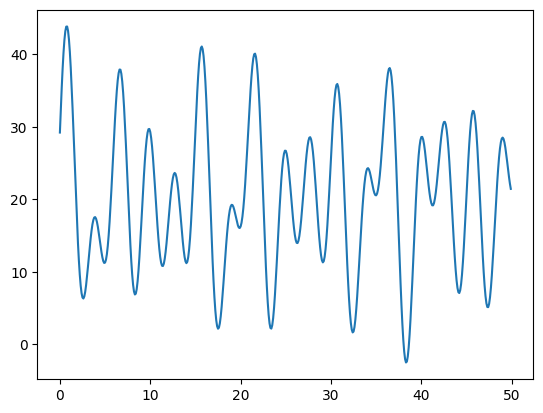

In [23]:
import numpy as np
import matplotlib.pyplot as plt

pm = [3, 5, 7]
am = [10, 8, 6]
thm = [0, np.pi/6, np.pi/3]

a0 = 20

dt = 0.1
n = 500

tt = []
hh = []
for j in range(n):
    t = j * dt
    h = a0 + am[0] * np.sin(2*np.pi / pm[0]*t + thm[0]) \
        + am[1] * np.sin(2*np.pi / pm[1]*t + thm[1]) \
        + am[2] * np.sin(2*np.pi / pm[2]*t + thm[2])
    tt.append(t)
    hh.append(h)
plt.plot(tt, hh)
plt.show()

In [24]:
def fftfreq(length: int, dt: float = 1.0):
    '''
    借鉴np.fft
    f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
    f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    '''
    res = np.empty(n, int)
    N = (n - 1) // 2 + 1
    p1 = np.arange(0, N, 1, dtype=int)
    res[:N] = p1
    p2 = np.arange(-(n // 2), 0, 1, dtype=int)
    res[N:] = p2
    return res / (n * dt)

def fft(signal):
    """
    最简单的写法，不采用快速傅立叶变换算法。
    """
    n = len(signal)
    # 时间数组
    t = np.arange(0, n)
    # 初始化频率域信号
    F = np.zeros(n, dtype=complex)
    # 计算频率域信号
    for f in range(n):
        for t in range(n):
            F[f] += signal[t] * np.exp(-1j * 2 * np.pi * f * t / n)   #-1j在python里面就表示复数

    return F


## 对比我写的fft，和numpy的fft
这次是傅立叶变换，而不是功率谱

(0.0, 0.5)

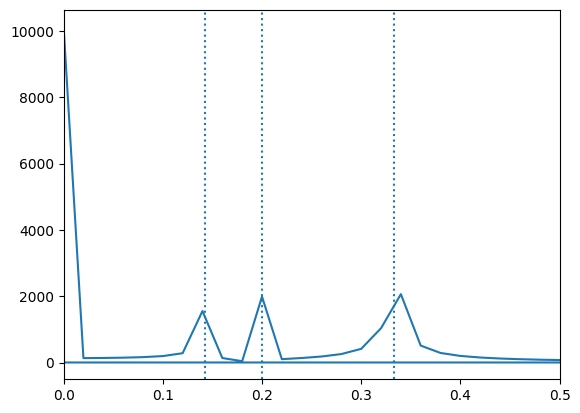

In [32]:
f = fft(hh)
f = np.abs(f)

freqs = fftfreq(len(hh), dt)

plt.plot(freqs, f)
plt.axvline(1 / pm[0], ls=":")
plt.axvline(1 / pm[1], ls=":")
plt.axvline(1 / pm[2], ls=":")
plt.xlim(0, 0.5)

(0.0, 0.5)

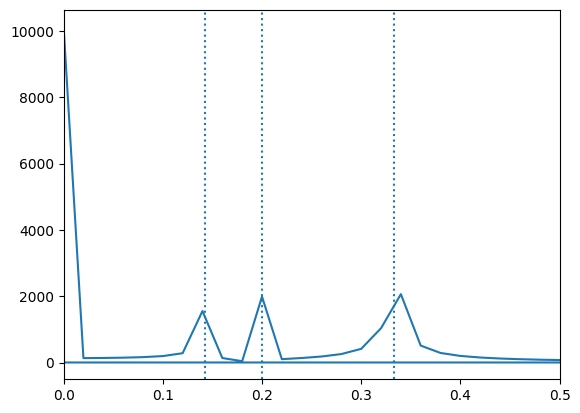

In [33]:
f = np.fft.fft(hh)
f = np.abs(f)

freqs = np.fft.fftfreq(len(hh), dt)

plt.plot(freqs, f)
plt.axvline(1 / pm[0], ls=":")
plt.axvline(1 / pm[1], ls=":")
plt.axvline(1 / pm[2], ls=":")
plt.xlim(0, 0.5)